# Zadanie z genomiki

## 1. Wykonaj kontrolę jakości pliku son.fq za pomocą programu FASTQC. Ścieżka dostępu do pliku - /work/git/edugen_pub/fastq/



In [1]:
! head -n 8 fastq/son.fq

@H0164ALXX140820:6:1101:10003:71138/1
GATGCTCAAACTCCAGGTAGTAACCTCAGGTTGTATCATAGCTCCTTTAGGGTACCTCACTGTTTTTAATAAGCACATGGTAAGGATGATGACTTCTCGTCATCTGAACGTATAATATAACAAAAACCTAAGCTACCCAAAGATGAGGAGT
+
=>>=@==?>>=>>>?9<=>?>>9:>?8>=>9<>=:==-=28=58=.;+;?)466;>?1.8>67<+9;>>=>=>:6<5>>':=5'5<=)9*),=-*1,+'*3=,)9)7+)$,,+?>;,,35?.?,@?*6=?@*8A,3,,7>9=..*<7=.-;
@H0164ALXX140820:6:1101:10003:71138/2
ATTGTGCTTAACAATGCTGTTCTGATCATGTCGAGCCCTAGATCGACAGGAGTTATTCACTATCCAAGATTATCAGGGCATAGCAAGAGAAGTTGTAGCATACACAATGATGCGCATGTCCCCCAGACTCTTCGATATGCGCAAAGTCGCT
+
995+7))>:,,94=,=96=,+79)6=+.,)6,$,)3++<+=,>269*;*=>)8<+;34?:/:,+?.-*6;>>;?@6???########################################################################


### a. Jaka jest mediana jakości odczytów dla nukleotydów w pozycji 2 i 3?

In [2]:
! fastqc fastq/son.fq -o sandbox/fastqc_reports/

Error: A JNI error has occurred, please check your installation and try again
Exception in thread "main" java.lang.UnsupportedClassVersionError: uk/ac/babraham/FastQC/FastQCApplication has been compiled by a more recent version of the Java Runtime (class file version 53.0), this version of the Java Runtime only recognizes class file versions up to 52.0
	at java.lang.ClassLoader.defineClass1(Native Method)
	at java.lang.ClassLoader.defineClass(ClassLoader.java:756)
	at java.security.SecureClassLoader.defineClass(SecureClassLoader.java:142)
	at java.net.URLClassLoader.defineClass(URLClassLoader.java:468)
	at java.net.URLClassLoader.access$100(URLClassLoader.java:74)
	at java.net.URLClassLoader$1.run(URLClassLoader.java:369)
	at java.net.URLClassLoader$1.run(URLClassLoader.java:363)
	at java.security.AccessController.doPrivileged(Native Method)
	at java.net.URLClassLoader.findClass(URLClassLoader.java:362)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at sun.misc.Launcher$App

Mediana jakości odczytów (czerwona linia) dla pozycji 2 i 3 to 27.

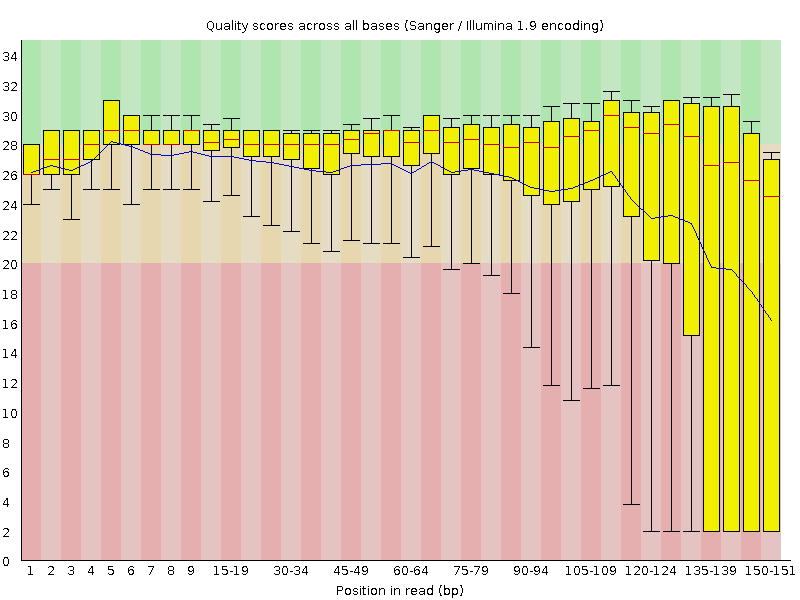

### b. Jaka jest średnia długość odczytów?

Średnia długość odczytów to 151.

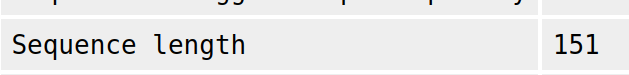

## 2. Przeprowadź mapowanie do genomu referencyjnego hg19
(ścieżka dostępu - /work/git/edugen_pub/ref/ref.fasta)

In [3]:
!bwa mem -p ref/ref.fasta fastq/son.fq > sandbox/son.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 54184 sequences (8181784 bp)...
[M::process] 0 single-end sequences; 54184 paired-end sequences
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (8, 25947, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (316, 373, 449)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (50, 715)
[M::mem_pestat] mean and std.dev: (387.14, 100.34)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 848)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 54184 reads in 5.052 CPU sec, 5.053 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem -p ref/ref.fasta fastq/son.fq
[main] Real time: 5.297 sec; CPU: 5.276 sec


Konwersja do formatu bam

In [4]:
!samtools view -b sandbox/son.sam -o sandbox/son.bam

### a. Sprawdź jaki procent odczytów zostało poprawnie zmapowanych

In [5]:
! samtools flagstat sandbox/son.bam

54306 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
122 + 0 supplementary
0 + 0 duplicates
53994 + 0 mapped (99.43% : N/A)
54184 + 0 paired in sequencing
27092 + 0 read1
27092 + 0 read2
53282 + 0 properly paired (98.34% : N/A)
53560 + 0 with itself and mate mapped
312 + 0 singletons (0.58% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


99.43% readów zostało poprawnie zmapowanych

## 3. Wykonaj Variant Calling na pliku son.bam, znajdującym się w katalogu /work/git/edugen_pub/bam/

In [6]:
import os
workspace = "/tmp/jovyan/work/git/edugen_pub/"
os.environ['WORKSPACE'] = workspace

In [7]:
! gatk HaplotypeCaller \
    -R ${WORKSPACE}/ref/ref.fasta \
    -I ${WORKSPACE}/bam/son.bam \
    -O ${WORKSPACE}/sandbox/sonHC.vcf \
    -L 20:10,000,000-10,200,000

Using GATK jar /opt/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar HaplotypeCaller -R /tmp/jovyan/work/git/edugen_pub//ref/ref.fasta -I /tmp/jovyan/work/git/edugen_pub//bam/son.bam -O /tmp/jovyan/work/git/edugen_pub//sandbox/sonHC.vcf -L 20:10,000,000-10,200,000
21:45:34.288 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/gatk-4.1.9.0/gatk-package-4.1.9.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
21:45:34.723 INFO  HaplotypeCaller - ------------------------------------------------------------
21:45:34.723 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.1.9.0
21:45:34.723 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
21:45:34.723 INFO  HaplotypeCaller - Exec

### a. Ile wariantów zostało wykryte?


Liczymy ile jest linii w pliku VCF pomijając komentarze

In [8]:
! cat ${WORKSPACE}sandbox/sonHC.vcf | grep -v "^#" | wc -l

421


W tym jest 6 wariantów biallelicznych

In [9]:
! vt view -f "N_ALLELE==3" sandbox/sonHC.vcf

20	10037144	.	T	TGATA,TGATAGATA	842.02	.	AC=1,1;AF=0.5,0.5;AN=2;DP=29;ExcessHet=3.0103;FS=0;MLEAC=1,1;MLEAF=0.5,0.5;MQ=60.91;QD=34.42;SOR=0.892	GT:AD:DP:GQ:PL	1/2:0,10,10:20:99:859,414,376,414,0,389
20	10098748	.	TAATGTGTATATATATATATATAATATATATATATATAC	*,T	159.01	.	AC=1,1;AF=0.5,0.5;AN=2;DP=9;ExcessHet=3.0103;FS=0;MLEAC=1,1;MLEAF=0.5,0.5;MQ=60;QD=22.72;SOR=4.174	GT:AD:DP:GQ:PL	1/2:0,3,4:7:99:296,169,159,127,0,114
20	10101674	.	TTGTG	T,TTGTGTGTG	678.02	.	AC=1,1;AF=0.5,0.5;AN=2;DP=31;ExcessHet=3.0103;FS=0;MLEAC=1,1;MLEAF=0.5,0.5;MQ=60.35;QD=29.63;SOR=1.061	GT:AD:DP:GQ:PL	1/2:0,7,10:17:99:695,419,463,276,0,246
20	10130249	.	AACAC	A,AAC	612.02	.	AC=1,1;AF=0.5,0.5;AN=2;DP=28;ExcessHet=3.0103;FS=0;MLEAC=1,1;MLEAF=0.5,0.5;MQ=60;QD=30.6;SOR=0.892	GT:AD:DP:GQ:PL	1/2:0,10,10:20:99:629,282,272,281,0,230
20	10134479	.	A	C,AAAGAAAGC	1257.06	.	AC=1,1;AF=0.5,0.5;AN=2;DP=34;ExcessHet=3.0103;FS=0;MLEAC=1,1;MLEAF=0.5,0.5;MQ=65.67;QD=27.86;SOR=0.793	GT:AD:DP:GQ:PL	1/2:0,12,7:19:99:1274,327,257,500,0,428


### b. Ile jest wariantów heterozygotycznych a ile homozygotycznych

In [10]:
! grep -v '^#' sandbox/sonHC.vcf |  cut -f 10 |  cut -f 1 -d: | sort | uniq -c

    185 0/1
    230 1/1
      6 1/2


Wariantów homozygotycznych (1/1) jest 230 a heterozygotycznych (0/1) 185.

## 4. Używając programu IGV sprawdź warianty w podanych pozycjach

### a. chr20:10043012 – podaj całkowita liczbę odczytów w danej pozycji zmianę nukleotydową w danej pozycji oraz liczbę odczytów zmienionych względem referencji

38 odczytów, zmiana C->G, 21 odczytów zmienionych względem referencji

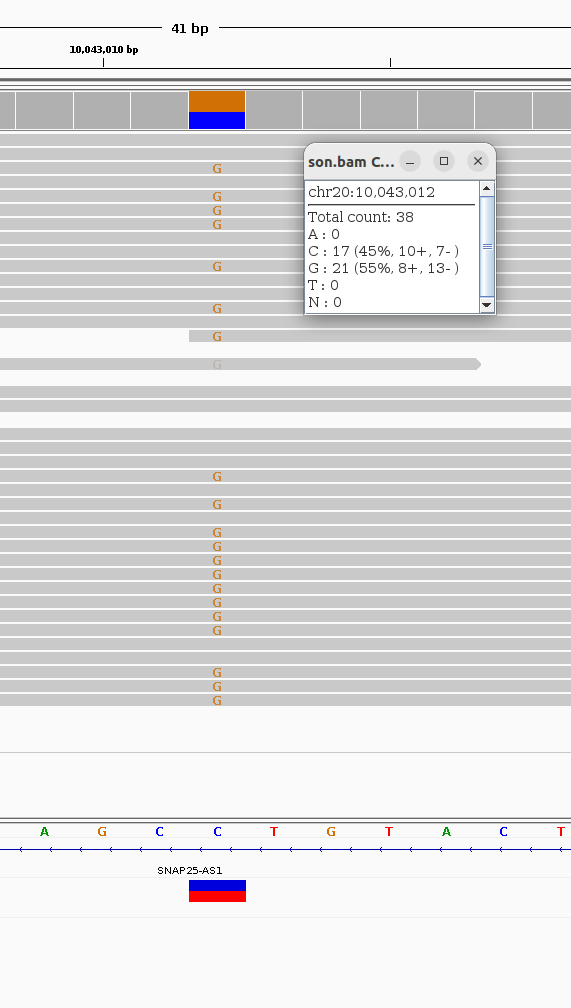

### b. chr20:10001436 – podaj rodzaj tej zmiany (snp, insercja, delecja?) oraz jej zygotyczność

Zmiana typu insercja 5 nukleotydów `AGGCT`, homozygotyczna

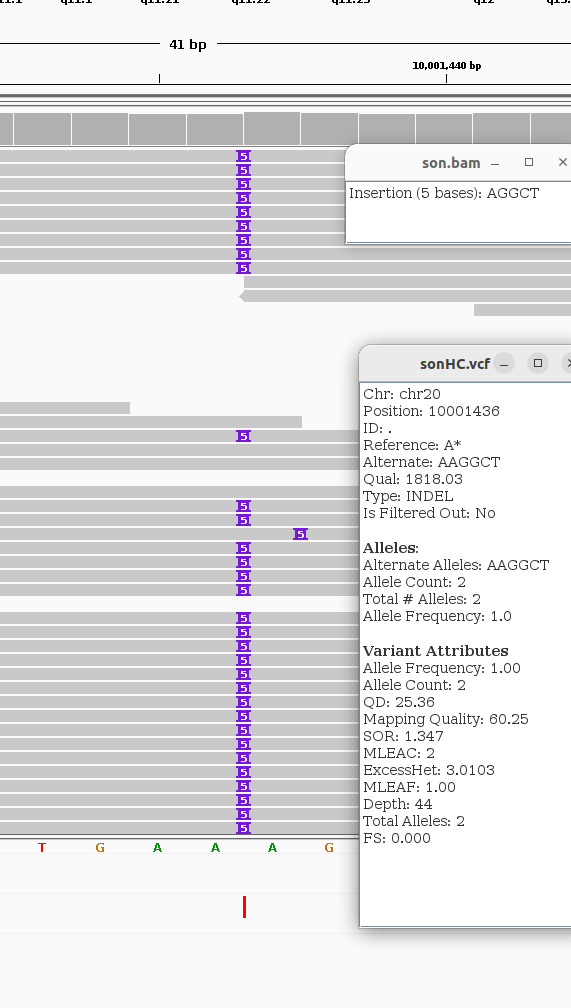

## 5. Przeprowadź adnotację pliku VCF otrzymanego na podstawie pliku son.bam z zadania 3 wykorzystując interfejs web programu VEP z domyślnymi opcjami

http://grch37.ensembl.org/Tools/VEP

### a. Ile wariantów znajduje się w intronach (w procentach – kolumna Consequence)

46% wariantów znajduje się w intronach.

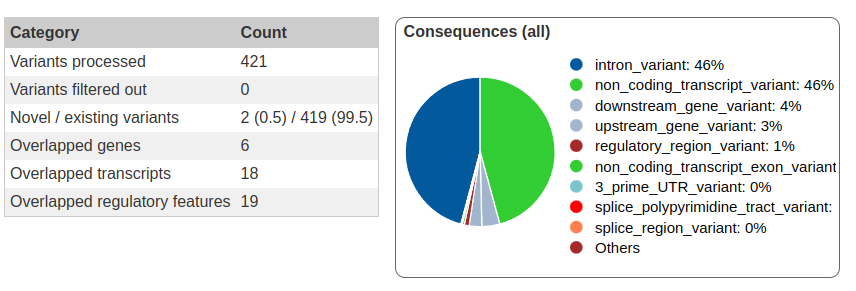

### b. Ile jest wariantów o częstości poniżej 0.01 (kolumna AF – Allele Frequency)

Zastosowano filtr `AF < 0.01` i wyeksportowano wyfiltrowany plik VCF.
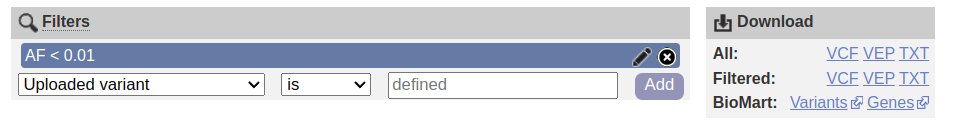

In [11]:
! cat ${WORKSPACE}sandbox/son_VEP_filtered.vcf | grep -v "^#" | wc -l

9
